# Support Vector Machines and Kernels

## <span style="color:blue">Alunos</span>

<ul>
    <li>Diego Santos Gonçalves - 20183012537</li>
    <li>Mariana Bulgarelli Alves dos Santos - 20183000330</li>
</ul>

## Introduction

We will be using the wine quality data set for these exercises. This data set contains various chemical properties of wine, such as acidity, sugar, pH, and alcohol. It also contains a quality metric (3-9, with highest being better) and a color (red or white). The name of the file is `Wine_Quality_Data.csv`.

In [1]:
from __future__ import print_function
import os
data_path = ['data']

## Question 1

* Import the data.
* Create the target variable `y` as a 1/0 column where 1 means red.
* Create a `pairplot` for the dataset.
* Create a bar plot showing the correlations between each column and `y`
* Pick the most 2 correlated fields (using the absolute value of correlations) and create `X`
* Use MinMaxScaler to scale `X`. Note that this will output a np.array. Make it a DataFrame again and rename the columns appropriately.

In [3]:
import pandas as pd
import numpy as np

filepath = os.sep.join(data_path + ['Wine_Quality_Data.csv'])
data = pd.read_csv(filepath, sep=',')

In [4]:
data

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [5]:
y = (data['color'] == 'red').astype(int)
fields = list(data.columns[:-1])  # everything except "color"
correlations = data[fields].corrwith(y)
correlations.sort_values(inplace=True)
correlations

total_sulfur_dioxide   -0.700357
free_sulfur_dioxide    -0.471644
residual_sugar         -0.348821
citric_acid            -0.187397
quality                -0.119323
alcohol                -0.032970
pH                      0.329129
density                 0.390645
fixed_acidity           0.486740
sulphates               0.487218
chlorides               0.512678
volatile_acidity        0.653036
dtype: float64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_context('talk')
sns.set_palette('dark')
sns.set_style('white')

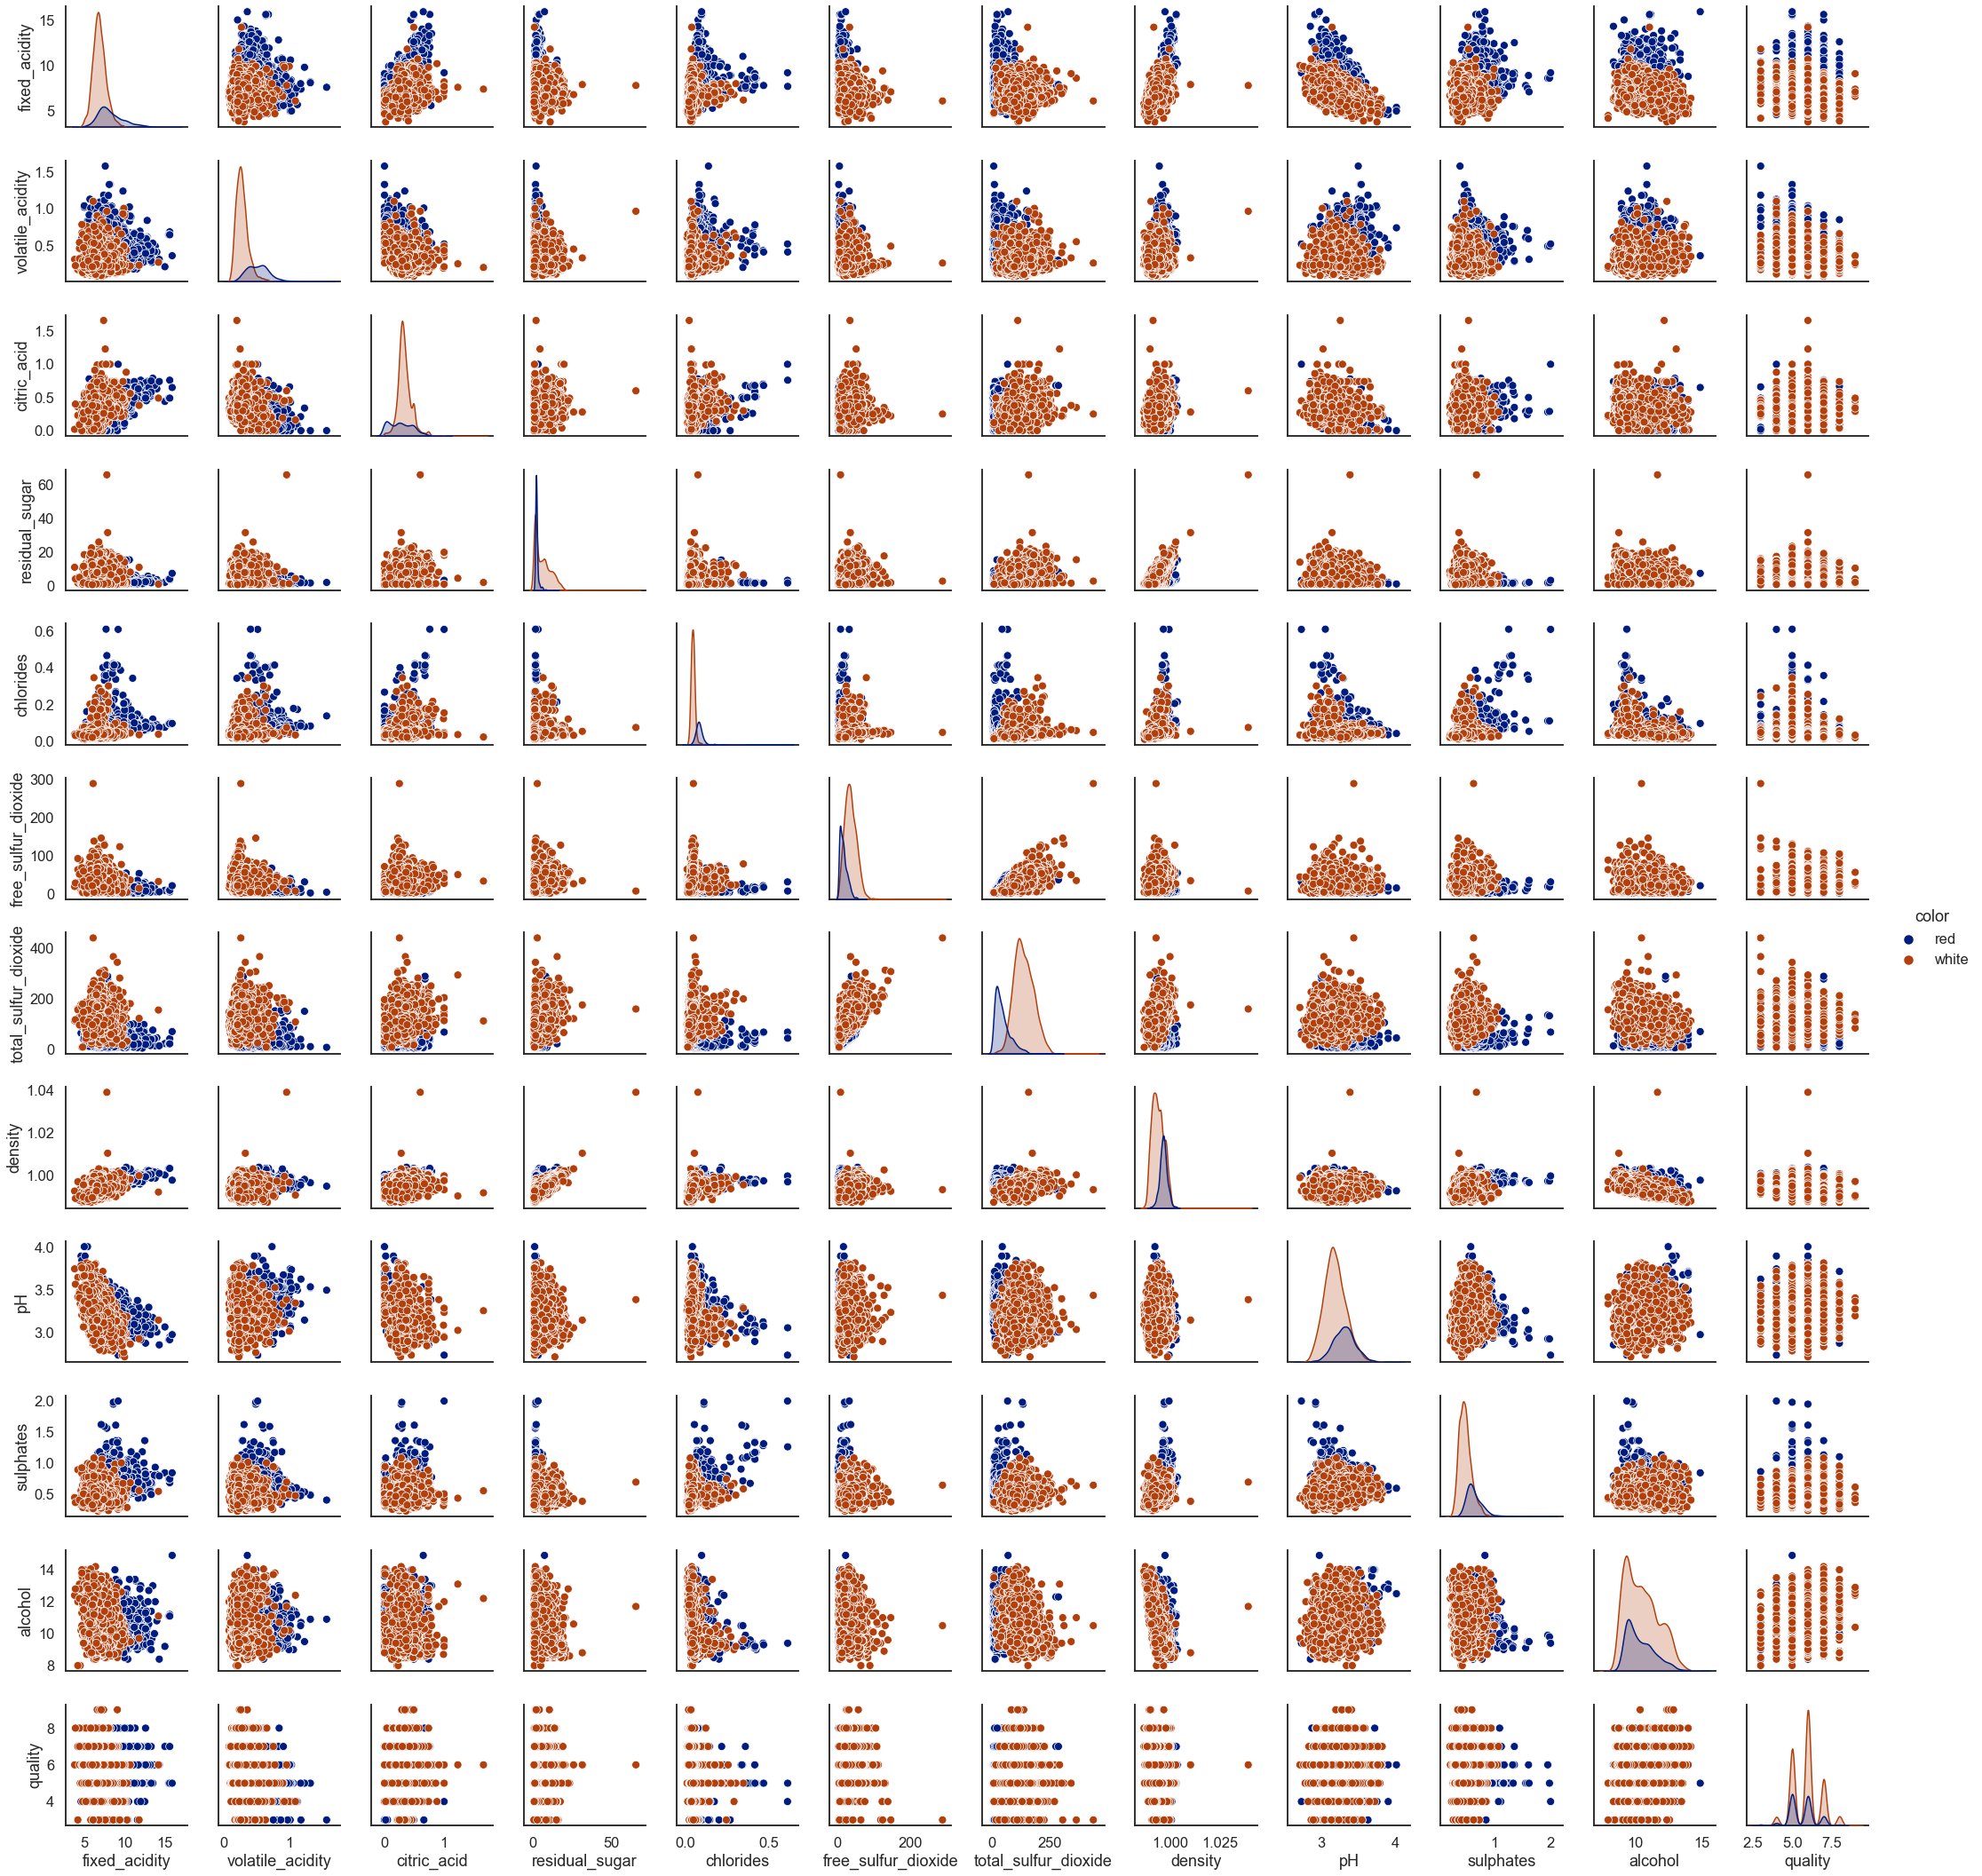

In [8]:
sns.pairplot(data, hue='color')

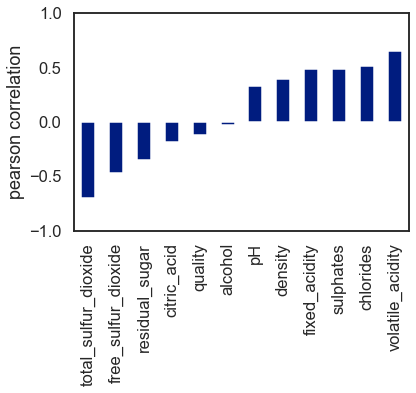

In [9]:
ax = correlations.plot(kind='bar')
ax.set(ylim=[-1, 1], ylabel='pearson correlation');

In [10]:
from sklearn.preprocessing import MinMaxScaler

fields = correlations.map(abs).sort_values().iloc[-2:].index
print(fields)
X = data[fields]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=['%s_scaled' % fld for fld in fields])
print(X.columns)

Index(['volatile_acidity', 'total_sulfur_dioxide'], dtype='object')
Index(['volatile_acidity_scaled', 'total_sulfur_dioxide_scaled'], dtype='object')


<span style="color:red">---------------------------------------------------------------------------------------------</span>
#### <span style="color:red">RESPOSTA</span>

<p>

   Inicialmente é analisada a correlação entre as features do dataset e a classe. 
   Foi utilizado o Coeficiente de correlação de Pearson, que mede a força da relação entre os movimentos relativos de duas variáveis, ou seja, o grau de linearidade entre as variáveis.
   Os resultados são plotados para avaliarmos como ocorre a distribuição dos dados.
</p>

fonte: https://datascience.eu/pt/matematica-e-estatistica/qual-e-o-coeficiente-de-correlacao/

<span style="color:red">---------------------------------------------------------------------------------------------</span>

## Question 2

The goal for this question is to look at the decision boundary of a LinearSVC classifier on this dataset. Check out [this example](https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html) in sklearn's documentation. 

* Fit a Linear Support Vector Machine Classifier to `X`, `y`.
* Pick 300 samples from `X`. Get the corresponding `y` value. Store them in variables `X_color` and `y_color`. This is because original dataset is too large and it produces a crowded plot.
* Modify `y_color` so that it has the value "red" instead of 1 and 'yellow' instead of 0.
* Scatter plot X_color's columns. Use the keyword argument "color=y_color" to color code samples.
* Use the code snippet below to plot the decision surface in a color coded way.

```python
x_axis, y_axis = np.arange(0, 1, .005), np.arange(0, 1, .005)
xx, yy = np.meshgrid(x_axis, y_axis)
xx_ravel = xx.ravel()
yy_ravel = yy.ravel()
X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
y_grid_predictions = *[YOUR MODEL]*.predict(X_grid)
y_grid_predictions = y_grid_predictions.reshape(xx.shape)
ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
```

Feel free to experiment with different parameter choices for LinearSVC and see the decision boundary.

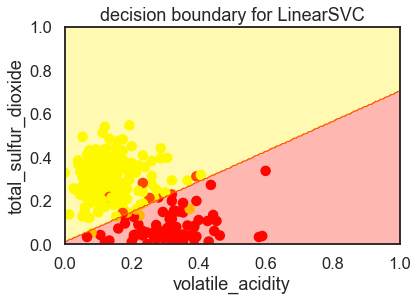

In [11]:
from sklearn.svm import LinearSVC

LSVC = LinearSVC()
LSVC.fit(X, y)

X_color = X.sample(300, random_state=45)
y_color = y.loc[X_color.index]
y_color = y_color.map(lambda r: 'red' if r == 1 else 'yellow')
ax = plt.axes()
ax.scatter(
    X_color.iloc[:, 0], X_color.iloc[:, 1],
    color=y_color, alpha=1)
# -----------
x_axis, y_axis = np.arange(0, 1.005, .005), np.arange(0, 1.005, .005)
xx, yy = np.meshgrid(x_axis, y_axis)
xx_ravel = xx.ravel()
yy_ravel = yy.ravel()
X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
y_grid_predictions = LSVC.predict(X_grid)
y_grid_predictions = y_grid_predictions.reshape(xx.shape)
ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
# -----------
ax.set(
    xlabel=fields[0],
    ylabel=fields[1],
    xlim=[0, 1],
    ylim=[0, 1],
    title='decision boundary for LinearSVC');

<span style="color:red">---------------------------------------------------------------------------------------------</span>
#### <span style="color:red">RESPOSTA</span>

<p>
O objetivo do SVM é encontrar um hiperplano em um espaço N-dimensional que classifique distintamente os pontos de dados. 
SVM linear usa o kernel linear, mas é implementado usando lib linear, por isso tem mais flexibilização na escolha de penalidade e função de perda. Melhor para um grande numero de amostras e apresenta boa performance em problemas com dados linearmente separáveis.
Encontra uma linha que separe as classes.
</p>

Fonte: https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47

https://repositorio.utfpr.edu.br/jspui/bitstream/1/16763/3/PG_COADS_2014_2_04.pdf

https://cursos.alura.com.br/forum/topico-o-que-a-funcao-linearsvc-faz-67341

<span style="color:red">---------------------------------------------------------------------------------------------</span>

## Question 3

Let's now fit a Gaussian kernel SVC and see how the decision boundary changes.

* Consolidate the code snippets in Question 2 into one function which takes in an estimator, `X` and `y`, and produces the final plot with decision boundary. The steps are:
    <ol>
     <li> fit model
     <li> get sample 300 records from X and the corresponding y's
     <li> create grid, predict, plot using ax.contourf
     <li> add on the scatter plot
    </ol>
* After copying and pasting code, make sure the finished function uses your input `estimator` and not the LinearSVC model you built.
* For the following values of `gamma`, create a Gaussian Kernel SVC and plot the decision boundary.  
`gammas = [.5, 1, 2, 10]`
* Holding `gamma` constant, for various values of `C`, plot the decision boundary. You may try  
`Cs = [.1, 1, 10]`

In [30]:
from sklearn.svm import SVC
#Fonte: https://sdsawtelle.github.io/blog/output/week7-andrew-ng-machine-learning-with-python.html

def plot_decision_boundary(X, y, gamma, C):
    #fit model
    Gaussian_SVC = SVC(kernel='rbf',gamma=gamma, C=C)
    Gaussian_SVC.fit(X,y)
    
    #get sample 300
    X_color = X.sample(300, random_state=45)
    y_color = y.loc[X_color.index]
    y_color = y_color.map(lambda r: 'blue' if r == 1 else 'green')
    
    #create grid
    x_axis, y_axis = np.arange(0, 1.005, .005), np.arange(0, 1.005, .005)
    xx, yy = np.meshgrid(x_axis, y_axis)
    xx_ravel = xx.ravel()
    yy_ravel = yy.ravel()
    X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
    
    #predict
    y_grid_predictions = Gaussian_SVC.predict(X_grid)
    y_grid_predictions = y_grid_predictions.reshape(xx.shape)
    
    #plot
    ax = plt.axes()
    ax.scatter( X_color.iloc[:, 0], X_color.iloc[:, 1], color=y_color, alpha=1)
    ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
    
    ax.set( xlabel=X.columns[0], ylabel=X.columns[1], xlim=[0, 1], ylim=[0, 1], title=f'Decision boundary for Guassian Kernel SVC _ gamma: {gamma} _  C: {C}')
    plt.show()
    plt.close()
    

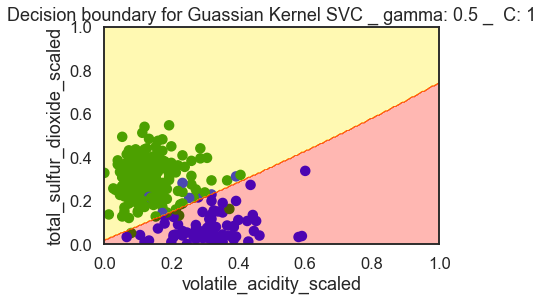

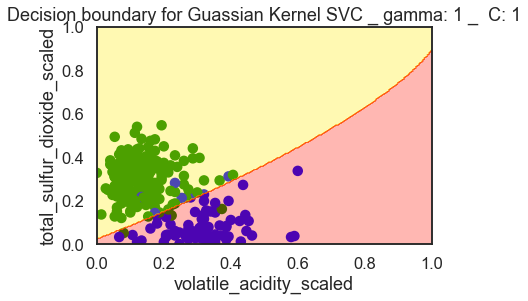

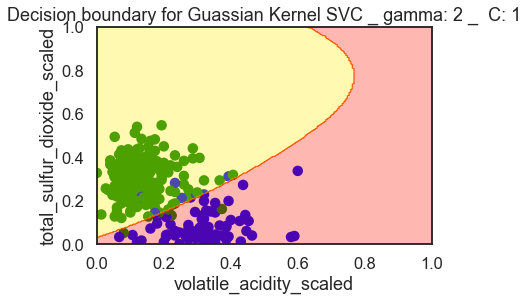

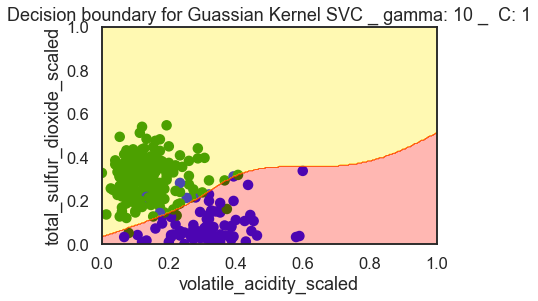

In [31]:
gammas = [.5, 1, 2, 10]
C = 1
for gamma in gammas:
    plot_decision_boundary(X, y ,gamma, C)

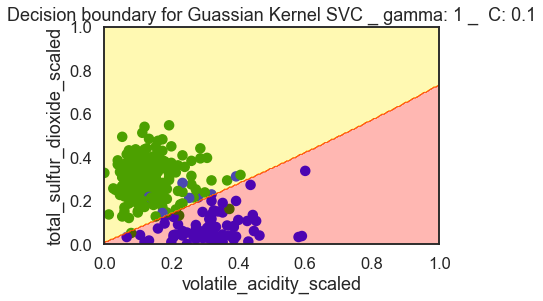

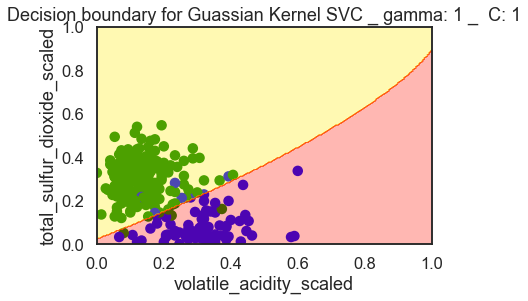

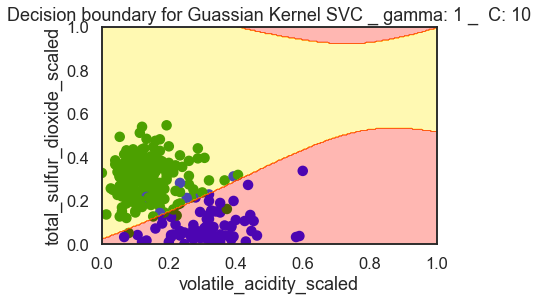

In [32]:
gamma = 1
Cs = [.1, 1, 10]
for C in Cs:
    plot_decision_boundary(X,y, gamma, C)

<span style="color:red">---------------------------------------------------------------------------------------------</span>
#### <span style="color:red">RESPOSTA</span>

<p>
O kernel gaussiano foi utilizado neste caso. Este kernel consegue resolver problemas não linearmente separáveis. Para buscar melhores resultados, podem ser ajustados os parâmetros γ (gamma) e C (custo). 
"O parâmetro gama define até onde a influência de um único exemplo de treinamento chega, com valores baixos significando ‘longe’ e valores altos significando ‘próximo’. Os parâmetros gama podem ser vistos como o inverso do raio de influência das amostras selecionadas pelo modelo como vetores de suporte" (SCIKIT-LEARN, s.d.).
Já para o parâmetro C, quanto maior, menor é a margem aceita se a função de decisão for melhor em classificar todos os pontos de treinamento corretamente.
No exercicio, ao aumentarmos o valor de gama, observamos que a curvatura obtida é maior. 
Um gama alto significa que os pontos próximos são muito mais importantes para a previsão do que os mais distantes. Assim, pode ocorrer picos, "pois a previsão depende muito de pontos individuais dos exemplos de treinamento, e não do que está ao redor deles" (DOBILAS, s.d.).
Ao mantermos o gamma constante e variarmos o C, observamos que ao aumentarmos C, a curvatura aumentou. Quanto maior o parametro C, maior a chance de ocorrer overfitting pois o sistema terá uma regularização baixa.
</p>

Fonte: 
JUNIOR, Gilson Medeiros de Oliveira. Máquina de Vetores Suporte: estudo e análise de parâmetros para otimização de resultado. Universidade Federal de Pernambuco, 2010. Disponível em: <https://www.cin.ufpe.br/~tg/2010-2/gmoj.pdf>. Acesso em: 22 jan. 2022.

SCIKIT-LEARN. RBF SVM parameters. Disponível em: <https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html>. Acesso em: 22 jan. 2022.

DOBILAS, Saul. Classificador SVM e kernel RBF - Como fazer melhores modelos em Python. ICHI.PRO. Disponível em: <https://ichi.pro/pt/classificador-svm-e-kernel-rbf-como-fazer-melhores-modelos-em-python-127248222170971>. Acesso em: 22 jan. 2022.

<span style="color:red">---------------------------------------------------------------------------------------------</span>

## Question 4

In this question, we will compare the fitting times between SVC vs Nystroem with rbf kernel.  
<br><br>
Jupyter Notebooks provide a useful magic function **`%timeit`** which executes a line and prints out the time it took to fit. If you type **`%%timeit`** in the beginning of the cell, then it will run the whole cell and output the running time.

* Re-load the wine quality data if you made changes to the original.
* Create `y` from data.color, and `X` from the rest of the columns.
* Use `%%timeit` to get the time for fitting an SVC with rbf kernel.
* Use `%%timeit` to get the time for the following: fit_transform the data with Nystroem and then fit a SGDClassifier.

Nystroem+SGD will take much shorter to fit. This difference will be more pronounced if the dataset was bigger.

* Make 5 copies of X and concatenate them
* Make 5 copies of y and concatenate them
* Compare the time it takes to fit the both methods above

In [33]:
from sklearn.kernel_approximation import Nystroem
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

y = data.color == 'red'
X = data[data.columns[:-1]]

kwargs = {'kernel': 'rbf'}
svc = SVC(**kwargs)
nystroem = Nystroem(**kwargs)
sgd = SGDClassifier()

In [34]:
%%timeit
svc.fit(X, y)

316 ms ± 17.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [35]:
%%timeit
X_transformed = nystroem.fit_transform(X)
sgd.fit(X_transformed, y)

132 ms ± 30.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [36]:
X2 = pd.concat([X]*5)
y2 = pd.concat([y]*5)

print(X2.shape)
print(y2.shape)

(32485, 12)
(32485,)


In [37]:
%timeit svc.fit(X2, y2)

8.1 s ± 849 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [20]:
%%timeit
X2_transformed = nystroem.fit_transform(X2)
sgd.fit(X2_transformed, y2)

262 ms ± 12.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<span style="color:red">---------------------------------------------------------------------------------------------</span>
#### <span style="color:red">RESPOSTA</span>

<p>
Ao compararmos os tempos de execução entre o SVC e o Nystroem para kernel rbf, observamos que o método Nystroem é mais rápido. Isto ocorre pois ele simplifica os cálculos para o kernel, aumentando sua velocidade de computação.
</p>

<span style="color:red">---------------------------------------------------------------------------------------------</span>